Change of currecy from 2019 to 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_2019 = pd.read_csv("2019_data.csv")
df_2020 = pd.read_csv("2020_data.csv")
df_2021 = pd.read_csv("2021_data.csv")
df_2022 = pd.read_csv("2022_data.csv")
df_2023 = pd.read_csv("2023_data.csv")


In [2]:
df_2019.head(10)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,INR=X,2019-01-01,69.709999,69.730003,69.430000,69.709999,69.709999,0.0
1,JPY=X,2019-01-01,109.629997,109.634003,109.589996,109.629997,109.629997,0.0
2,EUR=X,2019-01-01,0.870000,0.872220,0.865800,0.870090,0.870090,0.0
3,GBP=X,2019-01-01,0.784300,0.786500,0.783900,0.785050,0.785050,0.0
4,AUD=X,2019-01-01,1.420100,1.425500,1.406400,1.420100,1.420100,0.0
5,CAD=X,2019-01-01,1.339430,1.364600,1.326310,1.339430,1.339430,0.0
6,CHF=X,2019-01-01,0.983510,0.983700,0.981100,0.983510,0.983510,0.0
7,CNY=X,2019-01-01,6.877600,6.877600,6.873000,6.877600,6.877600,0.0
8,HKD=X,2019-01-01,7.831400,7.832300,7.828700,7.832000,7.832000,0.0
9,SGD=X,2019-01-01,1.362300,1.367800,1.361500,1.362200,1.362200,0.0


In [3]:
Initial = [69.709999,109.629997,0.870090,0.785050,1.420100,1.339430,0.983510,6.877600,7.832000,1.362200]

In [4]:
list1 = df_2019["Ticker"].unique().tolist()
list2 = []
for i in list1:
    list2.append(i[0]+i[1]+i[2])


In [5]:
list1

['INR=X',
 'JPY=X',
 'EUR=X',
 'GBP=X',
 'AUD=X',
 'CAD=X',
 'CHF=X',
 'CNY=X',
 'HKD=X',
 'SGD=X']

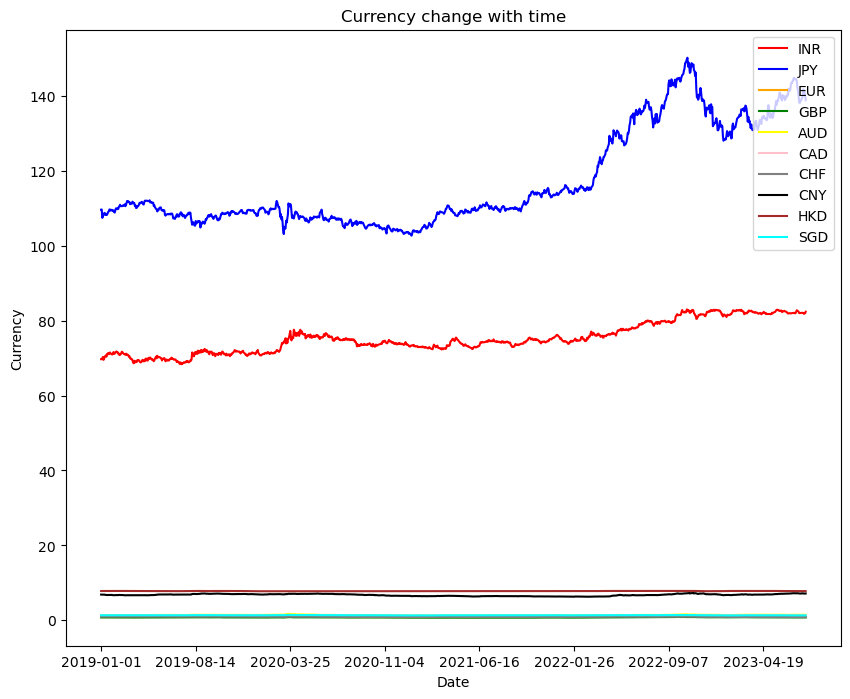

In [23]:
list3 = []

for i in list1:
    df = pd.concat([df_2019[df_2019["Ticker"]==i], df_2020[df_2020["Ticker"]==i],df_2021[df_2021["Ticker"]==i],df_2022[df_2022["Ticker"]==i],df_2023[df_2023["Ticker"]==i]], ignore_index=True)
    list3.append(df)


label = []
currency = []
ratio = []
date = []

for j in range(len(list3)):
    label.append(list2[j])
    currency.append(list3[j]["Adj Close"])
    ratio.append(list3[j]["Adj Close"]/Initial[j])
    date.append(list3[j]["Date"])

color_list = ["red","blue","orange","green","yellow","pink","grey","black","brown","cyan"]
plt.figure(figsize=(10,8))
for j in range((len(list3))):
    plt.plot(date[j],currency[j],label = label[j],color=color_list[j])
    plt.xticks(date[j][::160])
plt.xlabel("Date")
plt.ylabel("Currency")
plt.title("Currency change with time")
plt.legend()
plt.show()


    

<Figure size 1000x800 with 0 Axes>

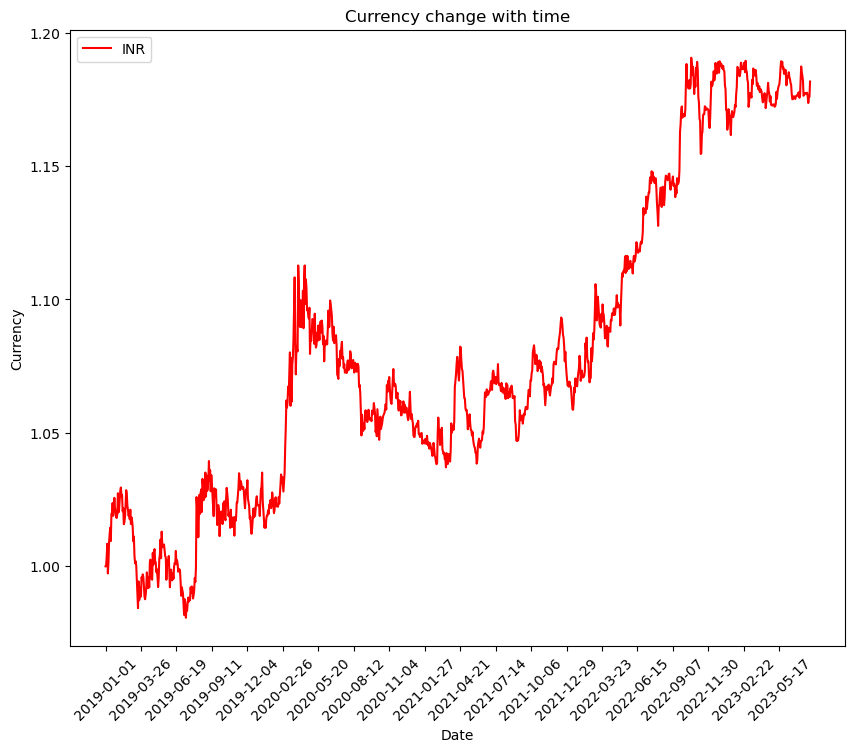

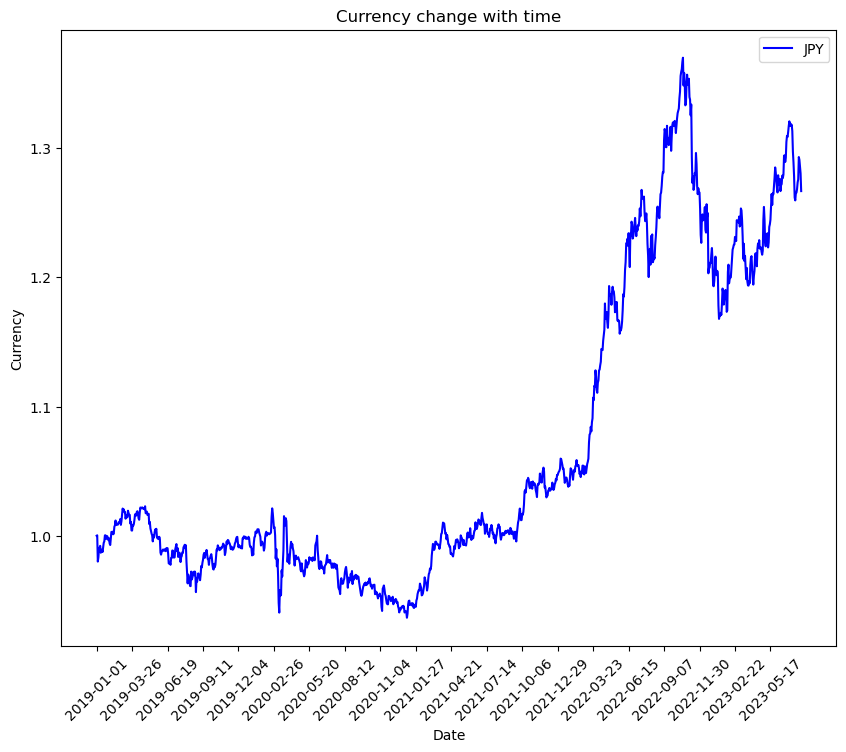

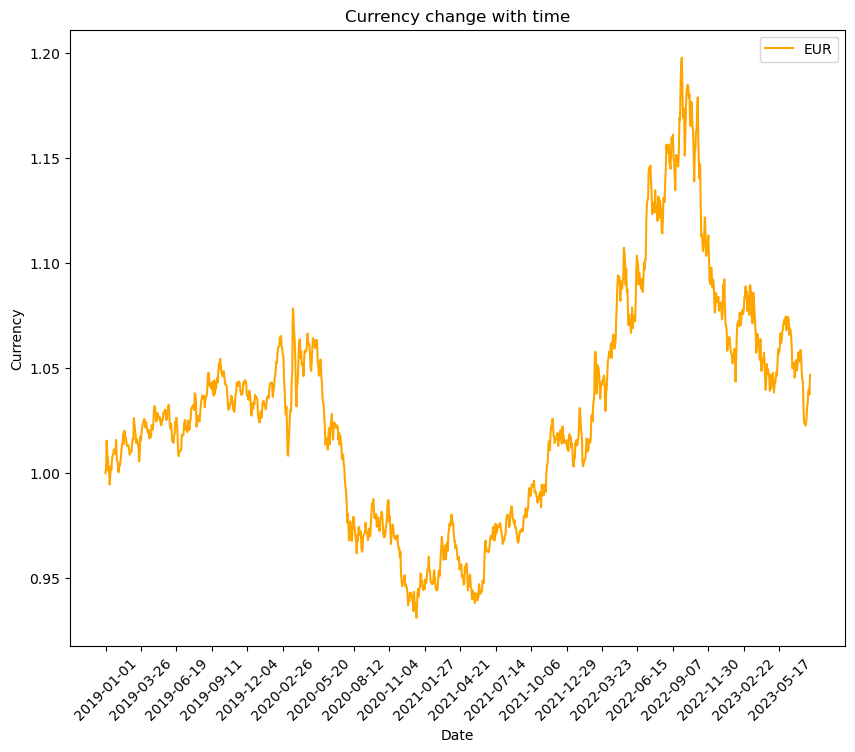

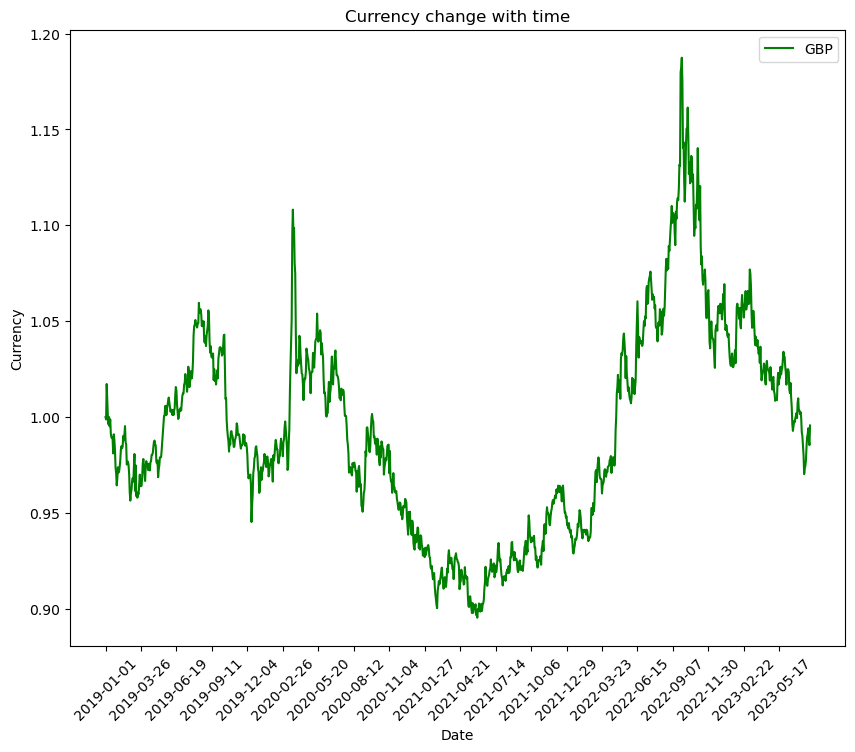

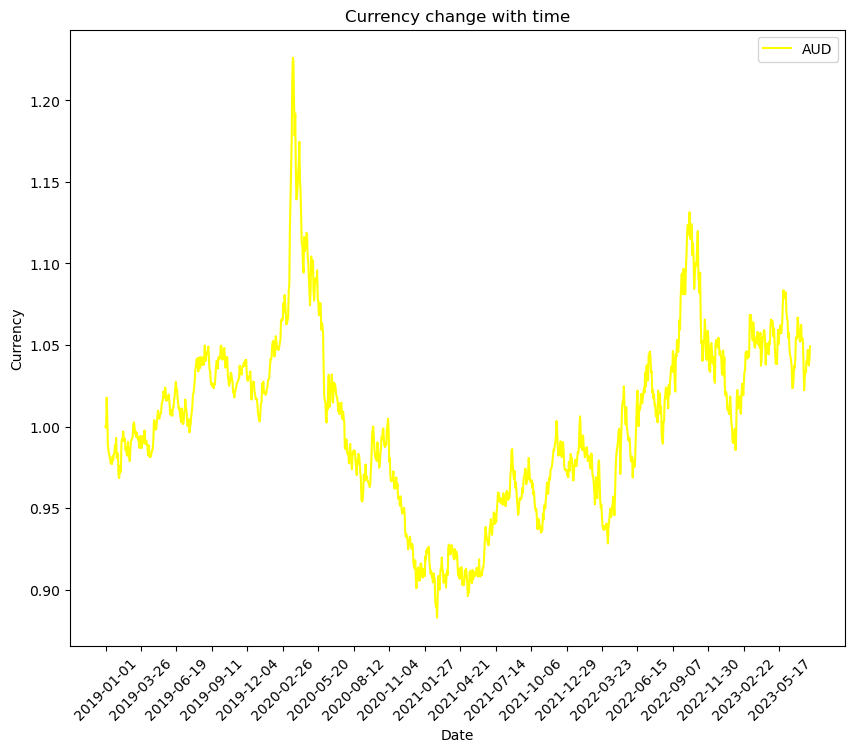

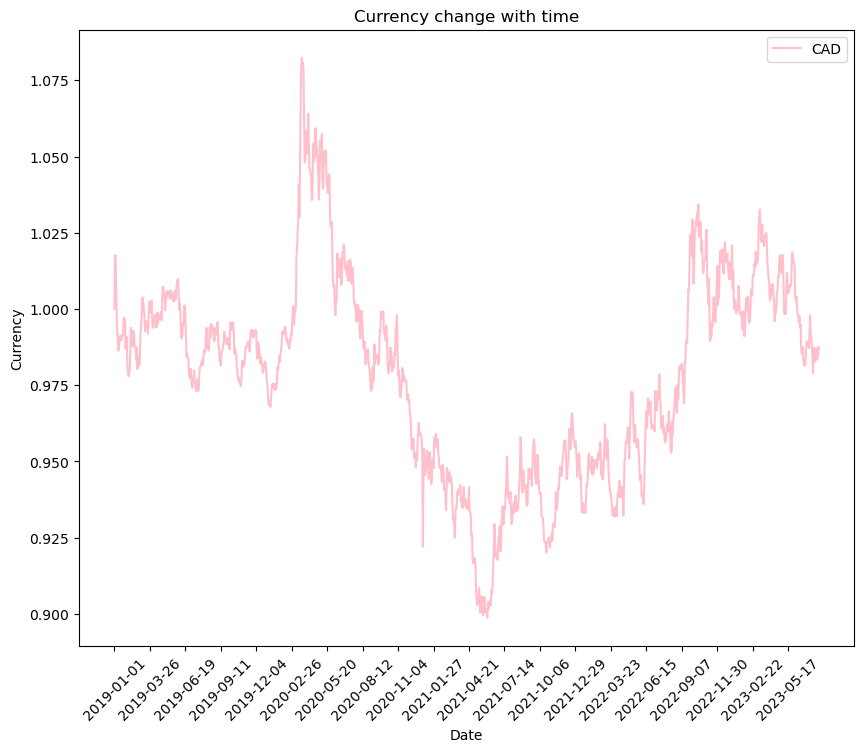

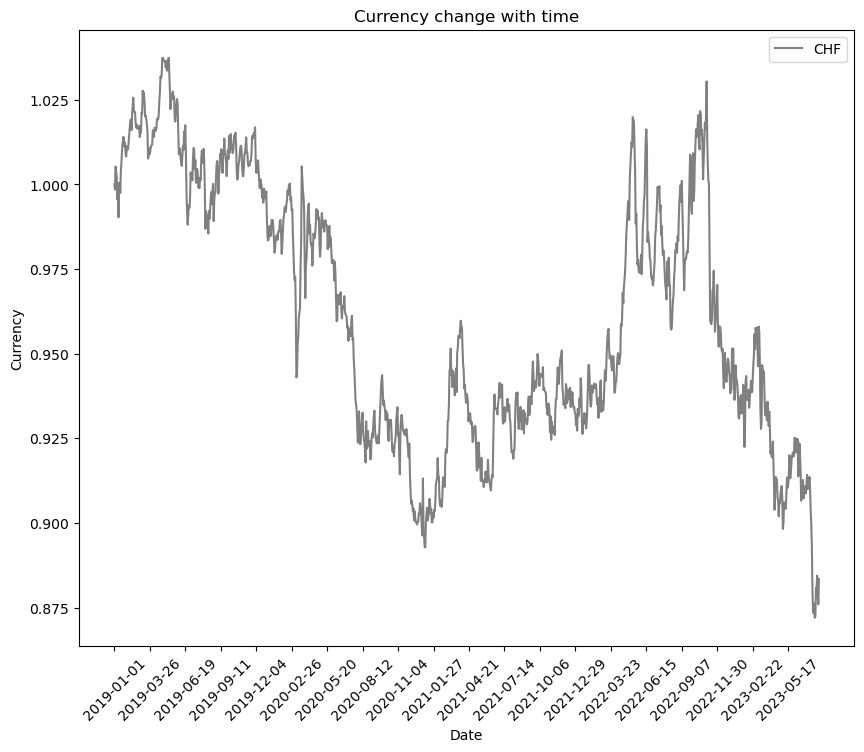

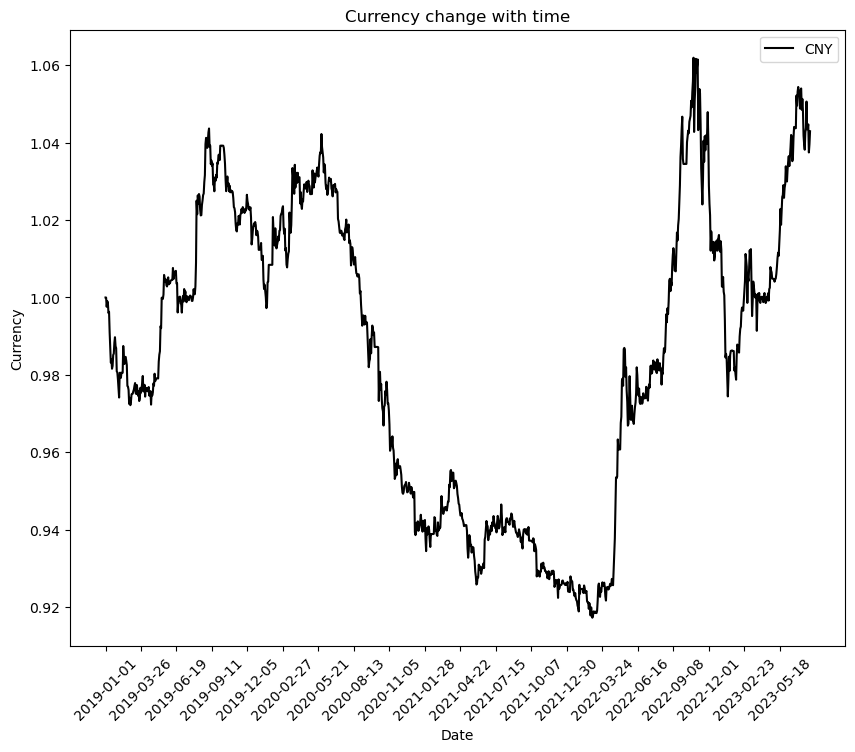

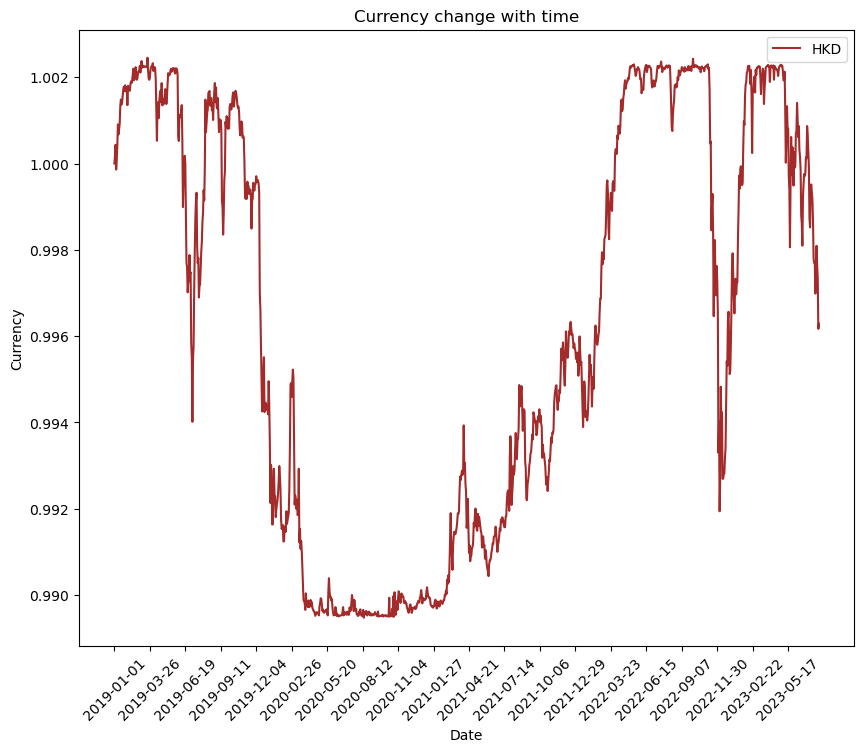

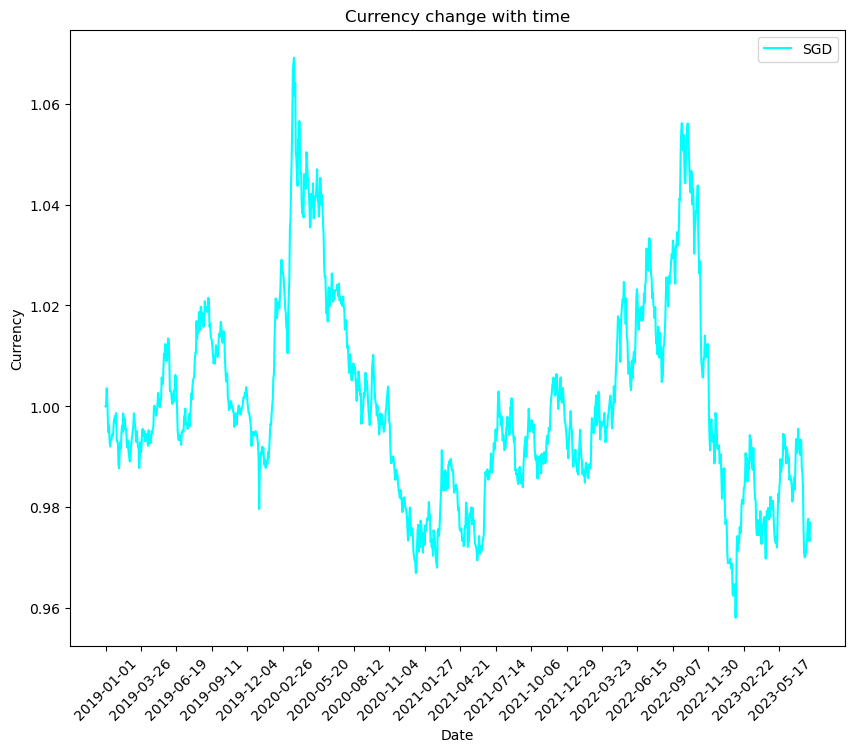

In [24]:
for j in range(len(list3)):
    label.append(list2[j])
    currency.append(list3[j]["Adj Close"])
    ratio.append(list3[j]["Adj Close"]/Initial[j])
    date.append(list3[j]["Date"])

color_list = ["red","blue","orange","green","yellow","pink","grey","black","brown","cyan"]
plt.figure(figsize=(10,8))
for j in range((len(list3))):
    plt.figure(figsize=(10,8))
    plt.plot(date[j],ratio[j],label = label[j],color=color_list[j])
    plt.xticks(date[j][::60],rotation =45)
    plt.xlabel("Date")
    plt.ylabel("Currency")
    plt.title("Currency change with time")
    plt.legend()
    plt.show()


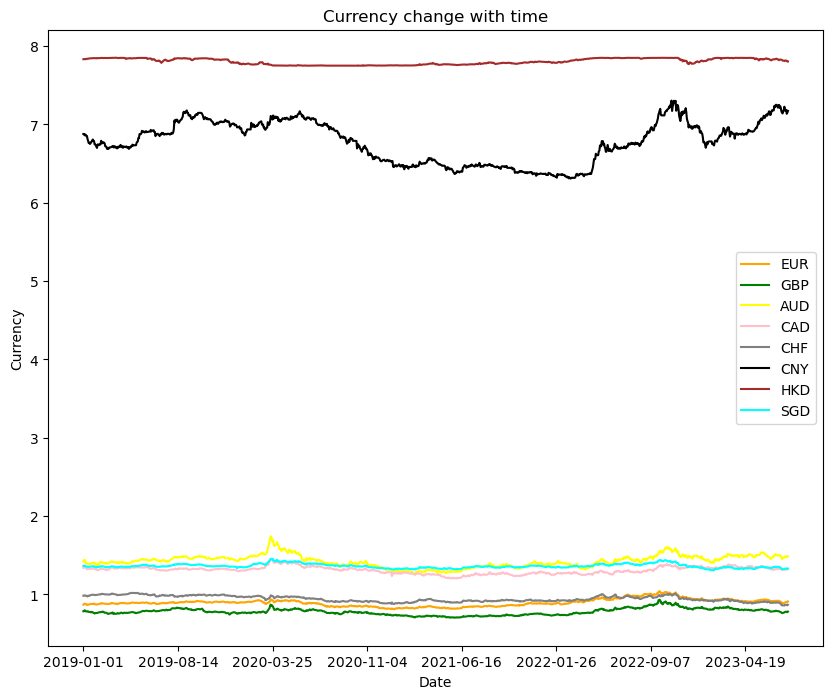

In [8]:
plt.figure(figsize=(10,8))
for j in range((len(list3))):
    if j>1:
        plt.plot(date[j],currency[j],label = label[j],color=color_list[j])
        plt.xticks(date[j][::160])
plt.xlabel("Date")
plt.ylabel("Currency")
plt.title("Currency change with time")
plt.legend()
plt.show()

From the graph, we can see that the currency rapidly change ("V" shape around 2020.3.25). That is because at that time the global pandemic is in very bad situation, so the investors rush for safety. There was a sudden surge in demand for US dollars, leading to a global “dollar shortage. This caused most currencies to depreciate rapidly. In contrast, traditional safe-haven currencies like the Japanese yen initially appreciated as investors sought lower-risk assets. 

However, as the US Federal Reserve intervened with aggressive monetary easing and liquidity swap lines with other central banks, the panic subsided. This led to a rapid reversal: the yen weakened back to its original level, while other currencies rebounded. 



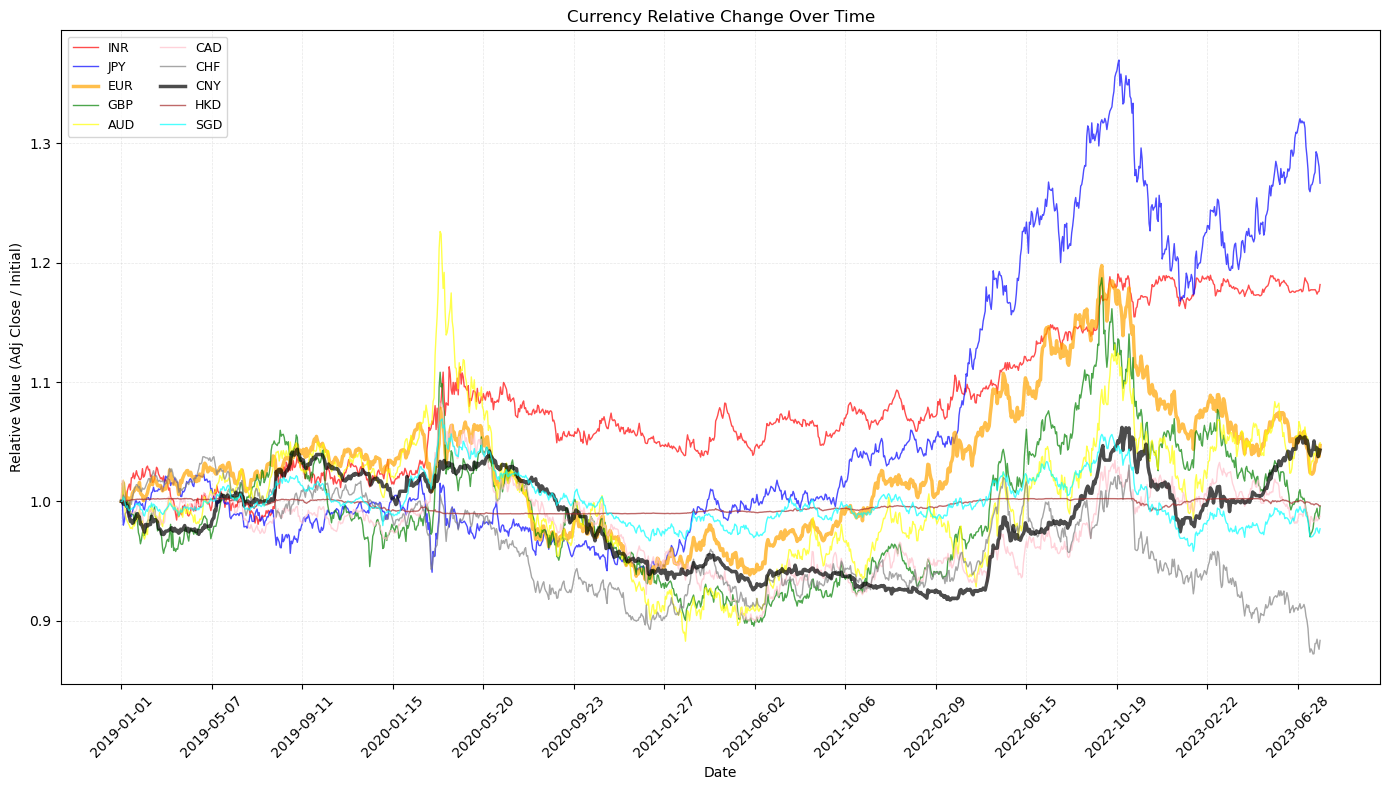

In [9]:
plt.figure(figsize=(14, 8))
for j in range(len(list3)):
    lw = 2.5 if label[j] in ['CNY', 'EUR'] else 1.0  
    plt.plot(date[j], ratio[j], label=label[j], color=color_list[j % len(color_list)], alpha=0.7, linewidth=lw)

plt.xticks(date[0][::90], rotation=45)
plt.xlabel("Date")
plt.ylabel("Relative Value (Adj Close / Initial)")
plt.title("Currency Relative Change Over Time")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
#plt.ylim(0.85, 1.3)
plt.legend(ncol=2, loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

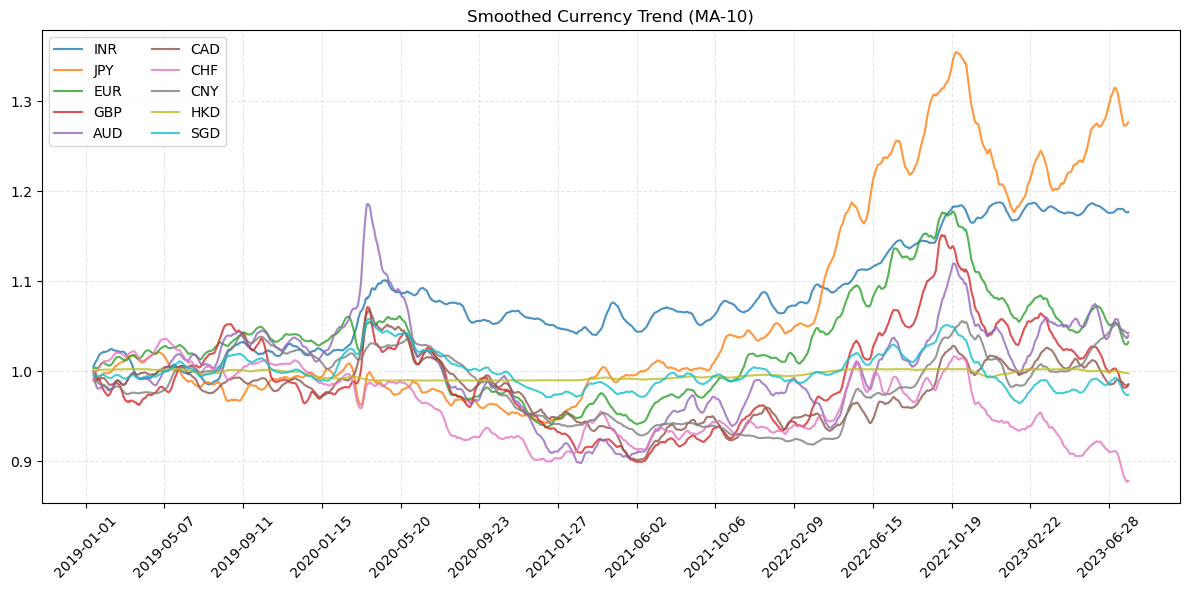

In [10]:
window = 10  
from pandas import Series

plt.figure(figsize=(12, 6))
for j in range(len(list3)):
    smooth = Series(ratio[j]).rolling(window=window).mean()
    plt.plot(date[j], smooth, label=label[j], alpha=0.8)

plt.legend(ncol=2)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(date[0][::90], rotation=45)
plt.title(f"Smoothed Currency Trend (MA-{window})")
plt.tight_layout()
plt.show()


In [11]:
list3[7]

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,CNY=X,2019-01-01,6.8776,6.8776,6.8730,6.8776,6.8776,0.0
1,CNY=X,2019-01-02,6.8775,6.8785,6.8433,6.8775,6.8775,0.0
2,CNY=X,2019-01-03,6.8611,6.8817,6.8611,6.8611,6.8611,0.0
3,CNY=X,2019-01-04,6.8710,6.8710,6.8549,6.8711,6.8711,0.0
4,CNY=X,2019-01-07,6.8684,6.8697,6.8396,6.8684,6.8684,0.0
...,...,...,...,...,...,...,...,...
1187,CNY=X,2023-07-24,7.1779,7.2058,7.1768,7.1779,7.1779,0.0
1188,CNY=X,2023-07-25,7.1853,7.1909,7.1287,7.1853,7.1853,0.0
1189,CNY=X,2023-07-26,7.1354,7.1607,7.1339,7.1354,7.1354,0.0
1190,CNY=X,2023-07-27,7.1500,7.1747,7.1196,7.1500,7.1500,0.0


In [12]:
list2

['INR', 'JPY', 'EUR', 'GBP', 'AUD', 'CAD', 'CHF', 'CNY', 'HKD', 'SGD']

In [25]:
start_date = "2020-01-01"
end_date = "2022-12-31"

# 初始化存储标准差结果
filtered_std_dict = {}

# 遍历每个币种数据
for j in range(len(list3)):
    df = list3[j].copy()
    df["Date"] = pd.to_datetime(df["Date"])
    
    # 过滤目标时间段
    df_filtered = df[(df["Date"] >= start_date) & (df["Date"] <= end_date)]
    
    # 计算标准化汇率比值
    y = df_filtered["Adj Close"]
    
    # 计算标准差
    filtered_std_dict[list2[j]] = y.std()

# 转换为 DataFrame 并按波动性降序排序
filtered_std_df = pd.DataFrame(list(filtered_std_dict.items()), columns=["Currency", "Std (2020–2022)"])
filtered_std_df = filtered_std_df.sort_values("Std (2020–2022)", ascending=False)

# 显示结果
print(filtered_std_df)

  Currency  Std (2020–2022)
1      JPY        12.735376
0      INR         2.844046
7      CNY         0.278869
4      AUD         0.087528
2      EUR         0.056107
5      CAD         0.049942
3      GBP         0.047891
8      HKD         0.036188
6      CHF         0.029560
9      SGD         0.029347


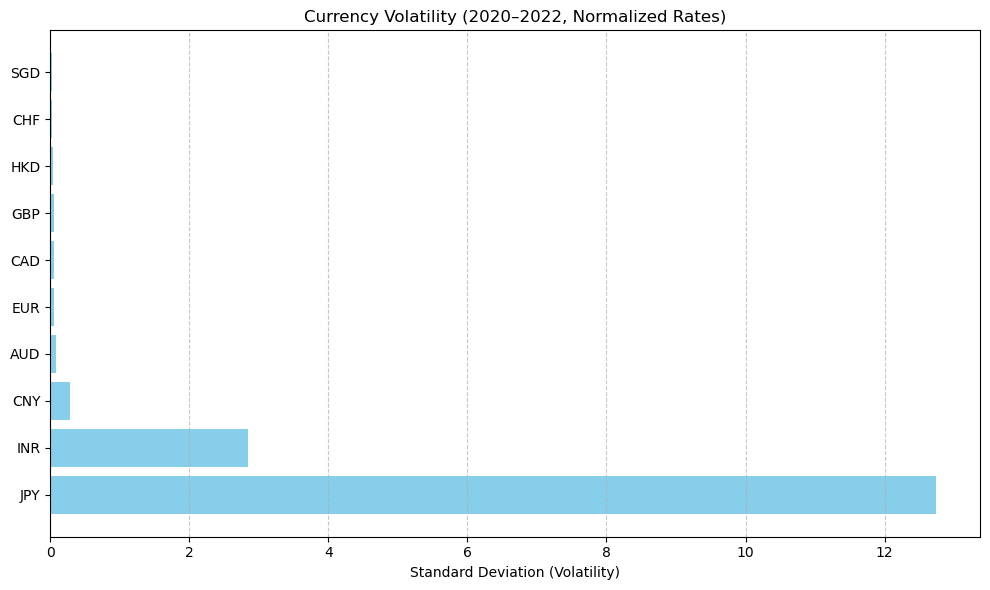

In [27]:
# 设置画图大小
plt.figure(figsize=(10, 6))

# 横向柱状图
plt.barh(filtered_std_df["Currency"], filtered_std_df["Std (2020–2022)"], color="skyblue")

# 添加标签与标题
plt.xlabel("Standard Deviation (Volatility)")
plt.title("Currency Volatility (2020–2022, Normalized Rates)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# 显示图
plt.show()

## ABANDON!!!!!Vaccinations:

Vaccinations play an important role in our war against covid 19. The rate of people taking vaccines can affect the policy of countries facing covid 19. 

We make an assumption that the recovery of ecomomy comes with the growth of vaccinated rate.

Firstly, we will divide the covid period into 6 categories. (The first vaccine is introduced in 22-07-2020)

period 1: before 2021.01.01

period 2: 2021.01.01 - 2021.06.31

period 3: 2021.07.01 - 2021.12.31

period 4: 2022.01.01 - 2022.06.30

period 5: 2022.07.01 - 2022.12.31

period 6: after 2022.12.31

In [13]:
import pandas as pd

# General dataset(only to see GDP)
url = "https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/owid-covid-data.csv"

df = pd.read_csv(url)

# Vaccine dataset
url2 = "https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/vaccinations/vaccinations.csv"

df3 = pd.read_csv(url2)

In [14]:
df3['date'] = pd.to_datetime(df3['date'])
df['date'] = pd.to_datetime(df['date'])

def period_separation(date):
    if date < pd.Timestamp('2021-01-01'):
        return 'Period 1'
    elif pd.Timestamp('2021-01-01') <= date <= pd.Timestamp('2021-06-30'):
        return 'Period 2'
    elif pd.Timestamp('2021-07-01') <= date <= pd.Timestamp('2021-12-31'):
        return 'Period 3'
    elif pd.Timestamp('2022-01-01') <= date <= pd.Timestamp('2022-06-30'):
        return 'Period 4'
    elif pd.Timestamp('2022-07-01') <= date <= pd.Timestamp('2022-12-31'):
        return 'Period 5'
    elif date > pd.Timestamp('2022-12-31'):
        return 'Period 6'
    else:
        return 'Unknown'

In [15]:
df3['Period'] = df3["date"].apply(period_separation)
df['Period'] = df["date"].apply(period_separation)

In [16]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [17]:
df.groupby(["Period","continent"])["Period"].count()

Period    continent    
Period 1  Africa           20634
          Asia             17702
          Europe           19621
          North America    14846
          Oceania           8688
          South America     5072
Period 2  Africa           10317
          Asia              9319
          Europe           10108
          North America     7421
          Oceania           4344
          South America     2534
Period 3  Africa           10488
          Asia              9568
          Europe           10304
          North America     7544
          Oceania           4416
          South America     2576
Period 4  Africa           10318
          Asia              9412
          Europe           10012
          North America     7421
          Oceania           4344
          South America     2534
Period 5  Africa           10488
          Asia              9542
          Europe           10120
          North America     7544
          Oceania           4416
          South Ame

In [18]:
df3.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million', 'daily_people_vaccinated',
       'daily_people_vaccinated_per_hundred', 'Period'],
      dtype='object')

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = df3.replace(" ", np.nan)
data_null = data.isnull().sum()
data_null = data_null.reset_index()
data_null.columns = ['Column', 'Missing Values']
data_null["With missing values"] = data_null["Missing Values"].apply(lambda x : x>0)

list_of_columns_missing_data = data_null[data_null["With missing values"]]["Column"].tolist()

In [20]:
list_of_columns_missing_data

['total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'daily_vaccinations_per_million',
 'daily_people_vaccinated',
 'daily_people_vaccinated_per_hundred']

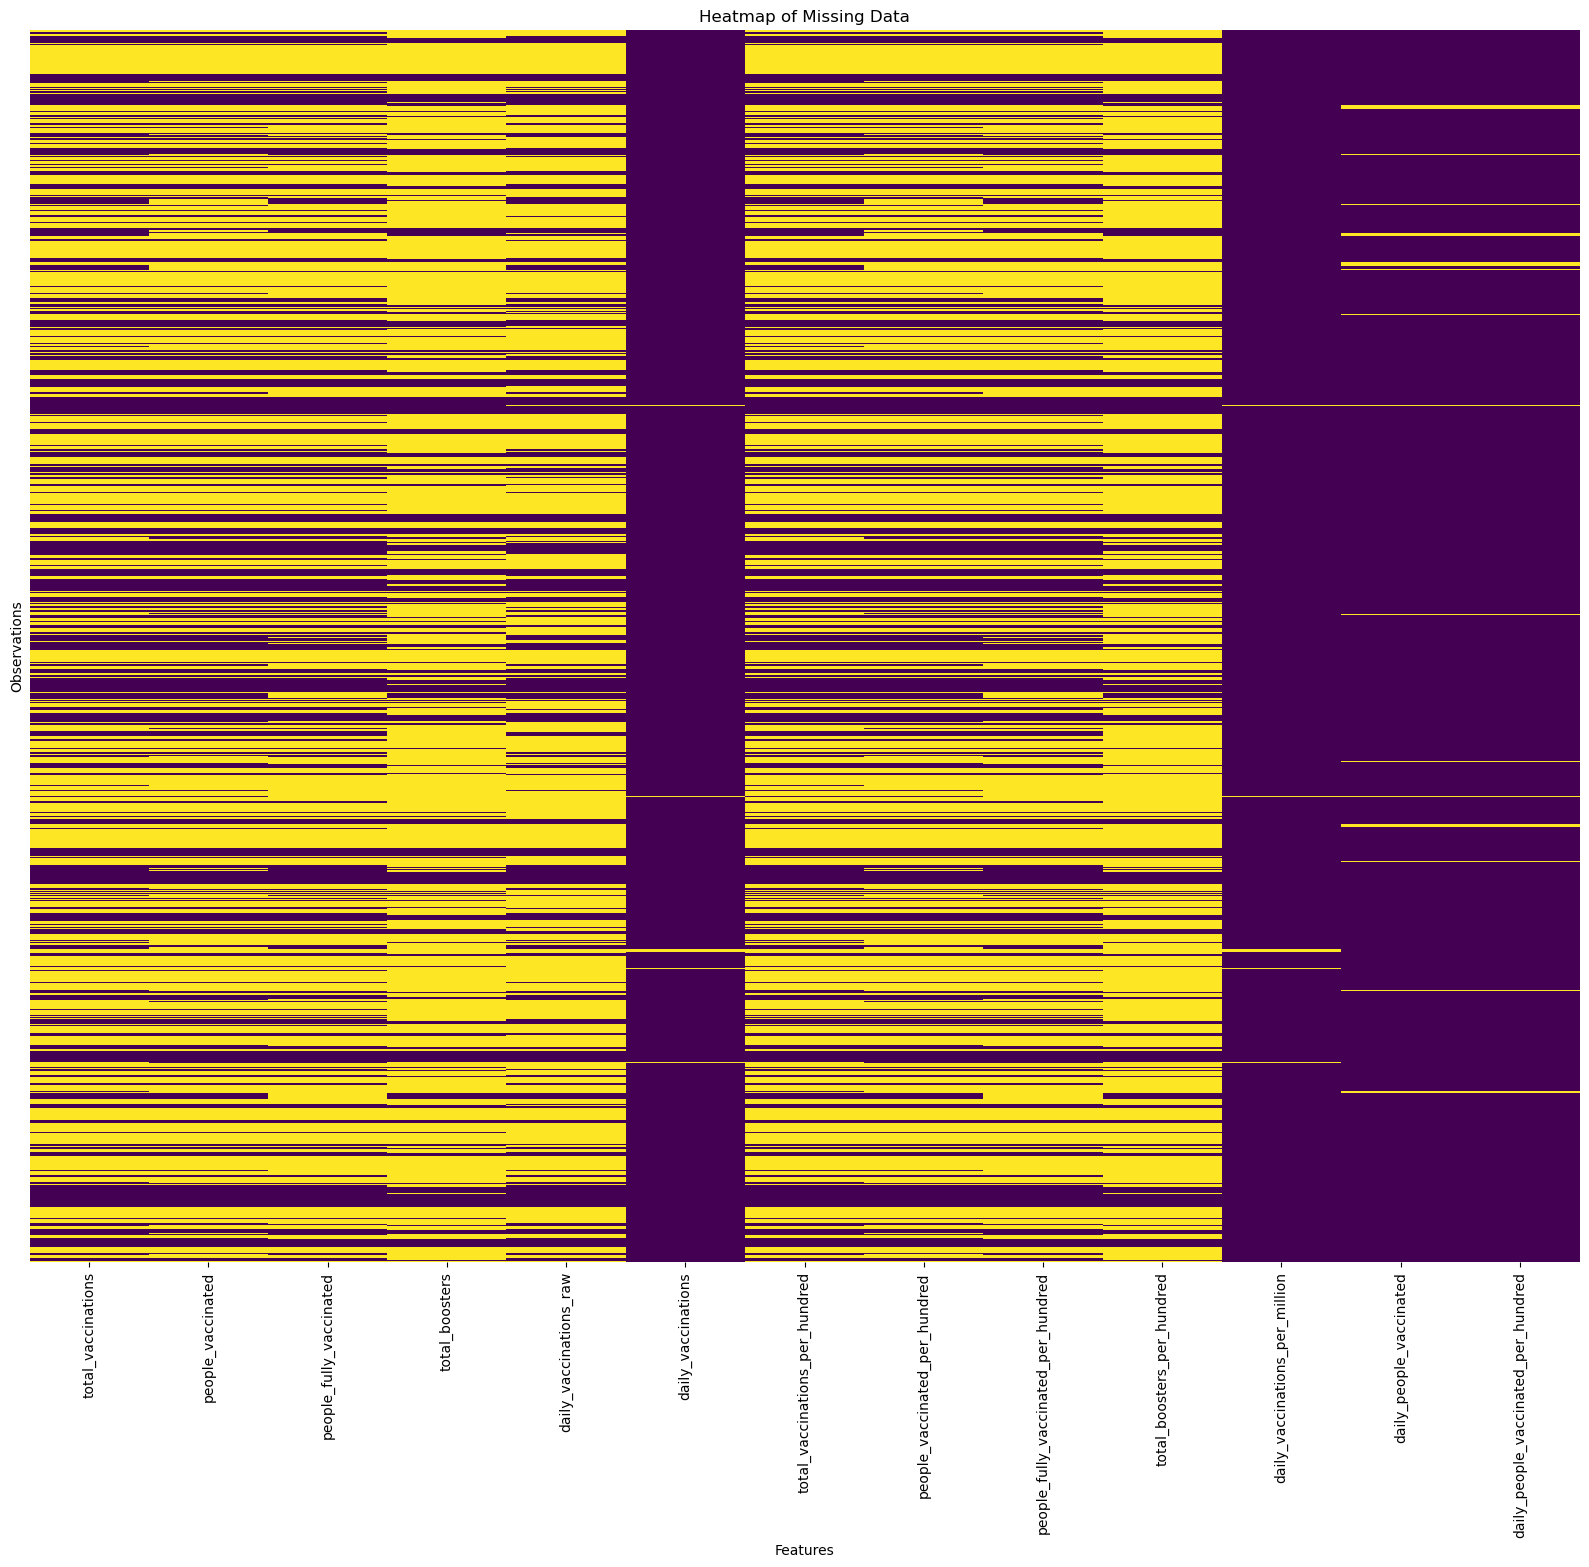

In [21]:
plt.figure(figsize=(20, 16))
sns.heatmap(data[list_of_columns_missing_data].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()

In [22]:
df2 = pd.read_csv("gdp-per-capita-worldbank.csv")
df2["continent"] = df2["Entity"]